In [3]:
# import plotly
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


In [1]:
def make_hypercube_matrix(n):
    matrix = nx.to_dict_of_lists(nx.generators.lattice.hypercube_graph(n))
    return matrix



In [4]:
G = nx.generators.lattice.hypercube_graph(7)

C:\Users\shriv\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


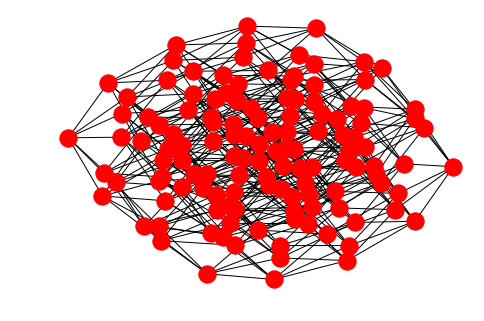

In [5]:
nx.draw(G)
plt.show()

In [7]:
H = nx.random_geometric_graph(200, 0.125)

In [36]:
for i in H.edges():
    print(i)
    break

(0, 98)


In [37]:
for a in G.nodes:
    print(a)
    break

(0, 0, 0, 0, 0, 0, 0)


In [38]:
list(G.nodes)[0]

(0, 0, 0, 0, 0, 0, 0)

In [39]:
H.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199))

In [40]:
H.nodes[0]

{'pos': [0.8215791250704745, 0.522710265508226]}

In [41]:
H.nodes[0]['pos']

[0.8215791250704745, 0.522710265508226]

In [42]:
# need to find a way to project  n dim into 2 dim subspace

In [43]:
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))


KeyError: 'pos'

In [ ]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

In [50]:
from pyvis.network import Network

In [18]:
g = Network(height=1000, width=1000, notebook=True)
g.toggle_hide_edges_on_drag(True)
g.barnes_hut()
nodes = nx.to_dict_of_lists(nx.generators.lattice.hypercube_graph(3))
nodelist = ["".join(map(str,key))+'n' for key in nodes]
print(nodelist)
g.add_nodes(nodelist)
g.add_edge("000n","010n", color="#000000")
g.show("hello1.html")

['000n', '001n', '010n', '011n', '100n', '101n', '110n', '111n']


In [24]:
from pyvis.network import Network
import networkx as nx
nx_graph = nx.cycle_graph(10)
nx_graph.nodes[1]['title'] = 'Number 1'
nx_graph.nodes[1]['group'] = 1
nx_graph.nodes[3]['title'] = 'I belong to a different group!'
nx_graph.nodes[3]['group'] = 10
nx_graph.add_node(20, size=20, title='couple', group=2)
nx_graph.add_node(21, size=15, title='couple', group=2)
nx_graph.add_edge(20, 21, weight=5)
nx_graph.add_node(25, size=25, label='lonely', title='lonely node', group=3)
nt = Network('500px', '500px')
# populates the nodes and edges data structures
nt.from_nx(hypercube)
nt.show('nx.html')

AssertionError: 

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
from aco_helper import *


Time taken to generate adjacency list is  0.000997781753540039  seconds
Time taken to generate randomized colouring is  0.0  seconds
<bound method OutEdgeView.data of EdgeView([('011', '010'), ('011', '111'), ('011', '001'), ('010', '000'), ('010', '110'), ('111', '101'), ('111', '110'), ('000', '001'), ('000', '100'), ('101', '001'), ('101', '100'), ('100', '110')])>


C:\Users\shriv\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


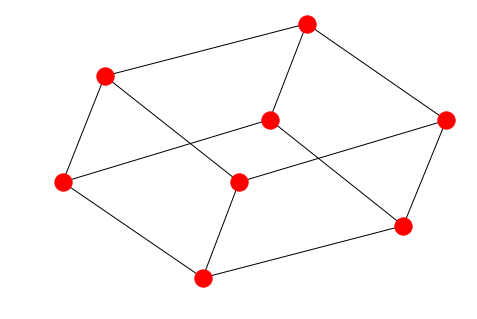

In [9]:
import ACO_Hypercube_PreDetermined_Random as ahpr
hypercube = nx.Graph()
n = 3
colored_edges = ahpr.initialize(n)[-1]
edgelist = [("".join(map(str,node1)), "".join(map(str,node2)),  {'color':color}) for color in colored_edges for node1 in colored_edges[color] for node2 in colored_edges[color][node1]]
hypercube.add_edges_from(edgelist)
nx.draw(hypercube)


In [7]:
g = Network(height=2000,width=2000,notebook=True)
g.toggle_hide_edges_on_drag(False)
g.barnes_hut()
g.from_nx(hypercube)
g.show("ex.html")